In [1]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

# Generate synthetic data 

In [2]:
N = 100
D = 1
L = 3
P = 3

In [3]:
def generate_data(N=100):
    X = np.random.rand(N)[:, None] * 10 - 5  # Inputs = N x D
    G = np.hstack((0.5 * np.sin(3 * X) + X, 3.0 * np.cos(X) - X))  # G = N x L
    W = np.array([[0.5, -0.3, 1.5], [-0.4, 0.43, 0.0]])  # L x P
    F = np.matmul(G, W)  # N x P
    Y = F + np.random.randn(*F.shape) * [0.2, 0.2, 0.2]

    return X, Y

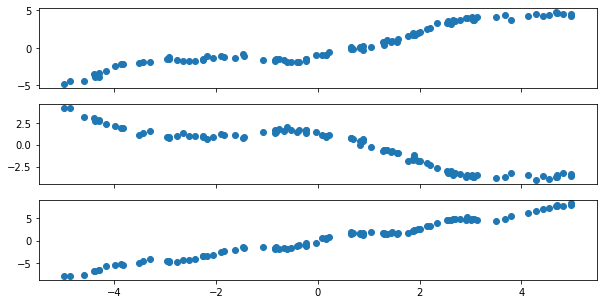

In [4]:
X, Y = data = generate_data(N)
f, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 5))
for i in range(P):
    axes[i].plot(X, Y[:,i], linestyle='', marker='o')

In [65]:
K=GPy.util.multioutput.LCM(1, 3, [GPy.kern.RBF(1),GPy.kern.RBF(1),GPy.kern.RBF(1)], W_rank=1)
K

sum.,value,constraints,priors
ICM0.rbf.variance,1.0,+ve,
ICM0.rbf.lengthscale,1.0,+ve,
ICM0.B.W,"(3, 1)",,
ICM0.B.kappa,"(3,)",+ve,
ICM1.rbf.variance,1.0,+ve,
ICM1.rbf.lengthscale,1.0,+ve,
ICM1.B.W,"(3, 1)",,
ICM1.B.kappa,"(3,)",+ve,
ICM2.rbf.variance,1.0,+ve,
ICM2.rbf.lengthscale,1.0,+ve,


In [67]:
m = GPy.models.GPCoregionalizedRegression([X,X,X], [Y[:,[0]],Y[:,[1]],Y[:,[2]]],kernel=K,W_rank=3)
m['.*B.*kappa'].constrain_fixed(1.)
m

gp.,value,constraints,priors
sum.ICM0.rbf.variance,1.0,+ve,
sum.ICM0.rbf.lengthscale,1.0,+ve,
sum.ICM0.B.W,"(3, 1)",,
sum.ICM0.B.kappa,"(3,)",+ve fixed,
sum.ICM1.rbf.variance,1.0,+ve,
sum.ICM1.rbf.lengthscale,1.0,+ve,
sum.ICM1.B.W,"(3, 1)",,
sum.ICM1.B.kappa,"(3,)",+ve fixed,
sum.ICM2.rbf.variance,1.0,+ve,
sum.ICM2.rbf.lengthscale,1.0,+ve,


In [68]:
m.optimize()

In [69]:
m

gp.,value,constraints,priors
sum.ICM0.rbf.variance,1.0257519332728775e-11,+ve,
sum.ICM0.rbf.lengthscale,0.5945087504599808,+ve,
sum.ICM0.B.W,"(3, 1)",,
sum.ICM0.B.kappa,"(3,)",+ve fixed,
sum.ICM1.rbf.variance,7.071109268992937e-09,+ve,
sum.ICM1.rbf.lengthscale,16.766138554123415,+ve,
sum.ICM1.B.W,"(3, 1)",,
sum.ICM1.B.kappa,"(3,)",+ve fixed,
sum.ICM2.rbf.variance,1.6260333735062635e-10,+ve,
sum.ICM2.rbf.lengthscale,2.3126437647712765,+ve,


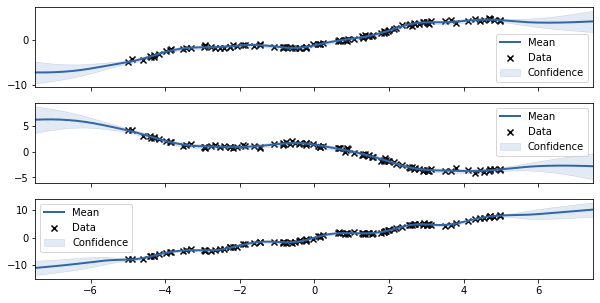

In [70]:
f, axes = plt.subplots(3, 1, sharex=True, figsize=(10, 5))
for i in range(P):
    #axes[i].plot(X, Y[:,i], linestyle='', marker='o')
    m.plot(fixed_inputs=[(1,i)],which_data_rows=slice(i*N,i*N+N),ax=axes[i])

In [75]:
newX = np.linspace(-6,6, 1000)[:,None]
newX = np.hstack([newX,np.ones_like(newX)])
noise_dict = {'output_index':newX[:,1:].astype(int)}

In [105]:
mu, v = m.predict(newX,Y_metadata=noise_dict)

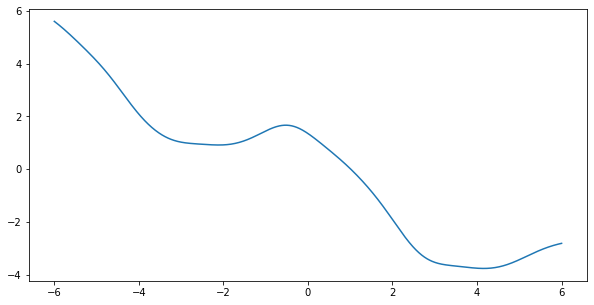

In [78]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.linspace(-6,6, 1000), mu)
a

In [118]:
Xstar = np.linspace(-6,6, 1000)[:,None]

Xs = np.vstack((np.hstack((Xstar, np.zeros_like(Xstar))), np.hstack((Xstar, np.ones_like(Xstar))), 
                np.hstack((Xstar, np.ones_like(Xstar) * 2))))
samples = m.posterior_samples(Xs)

TypeError: 'NoneType' object is not subscriptable

In [117]:
m['sum.ICM2.B.W']

index,gp.sum.ICM2.B.W,constraints,priors
[0 0],-146940.26259902,,
[1 0],165322.84548866,,
[2 0],-1448.56456094,,


In [109]:
mu, v = m.predict_noiseless(Xs)

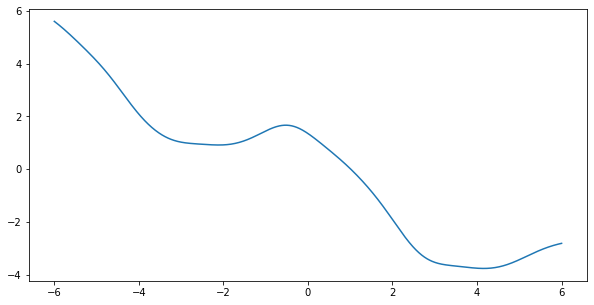

In [112]:
y2mean = mu[n:(n+n),:]
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.linspace(-6,6, 1000), y2mean)

In [92]:
samples = np.squeeze(samples)

In [94]:
n = 1000
y1samples = samples[:n,:]
y2samples = samples[n:(n+n),:]
y3samples = samples[(n+n):,:]

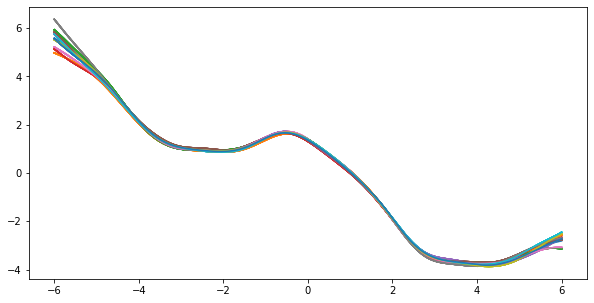

In [95]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.linspace(-6,6, 1000), mu)
for i in range(10):
    ax.plot(np.linspace(-6,6, 1000), y2samples)

In [102]:
class SLFM:
    
    def __init__(self, n_inputs, n_outputs):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
    
    def train(self, X, Y):
        
        K = GPy.util.multioutput.LCM(self.n_inputs, 
                                     self.n_outputs, 
                                     [GPy.kern.RBF(1) for i in range(self.n_outputs)], 
                                     W_rank=1)
        
        m = GPy.models.GPCoregionalizedRegression([X for i in range(self.n_outputs)], 
                                                  [Y[:,[i]] for i in range(self.n_outputs)],
                                                  kernel=K)
        
        m['.*B.*kappa'].constrain_fixed(1.)
        
        m.optimize()
        
        self._m = m
    
    def sample(self, Xstar):
        
        Xs = np.vstack((np.hstack((Xstar, np.zeros_like(Xstar))), np.hstack((Xstar, np.ones_like(Xstar))), 
                np.hstack((Xstar, np.ones_like(Xstar) * 2))))
samples = m.posterior_samples(Xs)

    
model = SLFM(1, 3)
model.train(X, Y)


In [103]:
model._m

gp.,value,constraints,priors
sum.ICM0.rbf.variance,1.549964075938708e-07,+ve,
sum.ICM0.rbf.lengthscale,0.6001532363452459,+ve,
sum.ICM0.B.W,"(3, 1)",,
sum.ICM0.B.kappa,"(3,)",+ve fixed,
sum.ICM1.rbf.variance,1.8840739852131875e-06,+ve,
sum.ICM1.rbf.lengthscale,2.15076047027261,+ve,
sum.ICM1.B.W,"(3, 1)",,
sum.ICM1.B.kappa,"(3,)",+ve fixed,
sum.ICM2.rbf.variance,6.530687322282566e-05,+ve,
sum.ICM2.rbf.lengthscale,15.673440128085426,+ve,
